# Mapping functions into Color spaces


![HSV](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/HSV_color_solid_cylinder.png/320px-HSV_color_solid_cylinder.png)

## Task 1: Grid

### Example with RGB

Let's create an image and draw small boxes of different colors to create a grid. Parameters **samples_x**, **samples_y** and **pixels_per_sample** will influence how large this grid is.

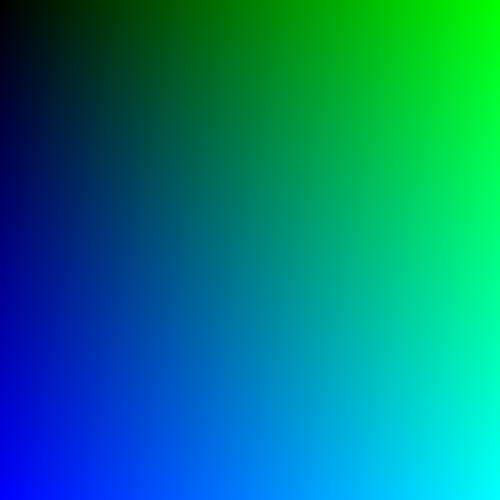

In [19]:
import numpy as np
import IPython.display
import PIL.Image
import random

# Draw a colors in grid of samples_x * samples_y

samples_x = 500
#samples_y = samples_x
samples_y = 500

pixels_per_sample = 1

size = [samples_x*pixels_per_sample, samples_y*pixels_per_sample, 3]
empty_image = np.zeros(size)

for i in range(samples_x):
    for j in range(samples_y):
        block = [i*pixels_per_sample, (i+1)*pixels_per_sample, j*pixels_per_sample, (j+1)*pixels_per_sample]
        #print(block)

        # i goes from 0 to samples_x
        # j goes from 0 to samples_y

        # Can we map i into of the coordinates of RGB system???
        r = g = b = 0 # Black
        
        # Example: Maping i into R
        # Note: We should convert the ranges ... this means if i originally
        #       went between 0 to samples_x (for example 100), then we need
        #       to convert it into a range for RGB values - between 0 and 255!
        i_normalized_01 = float(i) / (samples_x-1) # from 0.0 to 1.0
        b = 255 * i_normalized_01

        # Example: Maping j into G
        j_normalized_01 = float(j) / (samples_y-1) # from 0.0 to 1.0
        g = 255 * j_normalized_01

        #print(i_normalized_01, j_normalized_01)        

        color = [r,g,b]
        empty_image[block[0]:block[1],block[2]:block[3],:] = color


IPython.display.display(PIL.Image.fromarray(np.uint8(empty_image)))

### When RGB is not (intuitive) enough!

Well, RGB is nice, but what if we wanted to map into a parameter which makes more intuitive sense, than when we have to imagine which colors of red+green+blue mix ...

HSV to the rescue! HSV is also made from 3 values, here they don't control the primary mixing colors (the same as in sRGB will be used).

**HSV = (hue, saturation, value=brightness)**

In [20]:
# Short example with HSV:
# hsv2rgb

import colorsys

# Values go in between 0 and 1
h = 1.0
s = 0.1
v = 1.0
rgb_01 = colorsys.hsv_to_rgb(h, s, v)
print(rgb_01)
rgb = [round(rgb_01[0]*255),round(rgb_01[1]*255),round(rgb_01[2]*255)]
print(rgb)

(1.0, 0.9, 0.9)
[255, 230, 230]


Let's copy and edit the code from above (which used values in RGB):

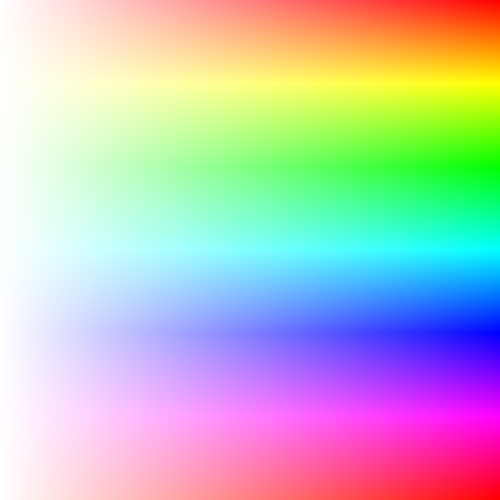

In [33]:
import numpy as np
import IPython.display
import PIL.Image
import random

# Draw a colors in grid of samples_x * samples_y

samples_x = 500
#samples_y = samples_x
samples_y = 500

pixels_per_sample = 1

size = [samples_x*pixels_per_sample, samples_y*pixels_per_sample, 3]
empty_image = np.zeros(size)

for i in range(samples_x):
    for j in range(samples_y):
        block = [i*pixels_per_sample, (i+1)*pixels_per_sample, j*pixels_per_sample, (j+1)*pixels_per_sample]
        #print(block)

        # i goes from 0 to samples_x
        # j goes from 0 to samples_y

        # Can we map i into of the coordinates of RGB system???
        h = s = v = 1.0 # Red
        

        # Example: Maping i into Hue
        # Note: In this case the h value expects numbers between 0.0 to 1.0 directly!
        i_normalized_01 = float(i) / (samples_x-1) # from 0.0 to 1.0
        h = i_normalized_01

        # Example: Maping j into V (value, also known as Brightness)
        j_normalized_01 = float(j) / (samples_y-1) # from 0.0 to 1.0
        s = j_normalized_01
        
        rgb_01 = colorsys.hsv_to_rgb(h, s, v)
        color = [round(rgb_01[0]*255),round(rgb_01[1]*255),round(rgb_01[2]*255)]
        empty_image[block[0]:block[1],block[2]:block[3],:] = color

IPython.display.display(PIL.Image.fromarray(np.uint8(empty_image)))


## Task 2: Additional mapping using a periodic function

### Let's use a periodic function

Define your own function f(x)! You can find some inspiration on https://www.desmos.com/calculator/b978bw7w3l

*PS: Just to keep it easy to predict what will happen, try to **normalize your function in between 0.0 and 1.0**.*

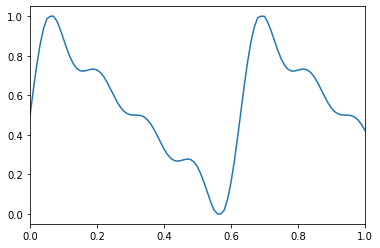

In [52]:
import math

def function(x):
    # frequency hacks:
    x = x * 10.0 # hax 4 higher frequency of oscillation
    #x = x / 10.0 # hax 4 lower frequency

    """
    # Place your favourite formula here!
    y = math.sin(x)
    # goes from -1 to 1 -> we want 0 to 1
    y = (y + 1.0) / 2.0
    """

    # advanced:
    #"""
    y = 0.5 + (math.sin(x) + (math.sin(2.0*x)/2.0) + (math.sin(3.0*x)/3.0) + (math.sin(4.0*x)/4.0)) / 3.0
    y = min(1.0, max(0.0, y))
    # again in between 0 and 1
    #"""

    return y

from matplotlib import pyplot as plt
xs = np.asarray(range(1000)) / 100.0
ys = [ function(x) for x in xs ]

plt.plot(xs,ys)
plt.xlim(0.0,1.0)
plt.show()

As a single strip of color:

In [53]:
import numpy as np
import IPython.display
import PIL.Image
import random
import math

# Sampling from a periodic function!

samples_x = 100
height = 20

pixels_per_sample = 5

size = [height, samples_x*pixels_per_sample, 3]
empty_image = np.zeros(size)

for i in range(samples_x):
    block = [i*pixels_per_sample, (i+1)*pixels_per_sample]
    #print(block)

    # i goes from 0 to samples_x
    
    # Can we map i into of the coordinates of RGB system???
    h = s = v = 1 # Red

    # Example: Maping i into Hue
    # Note: In this case the h value expects numbers between 0.0 to 1.0 directly!
    i_normalized_01 = float(i) / (samples_x-1) # from 0.0 to 1.0
    h = function(i_normalized_01)
    #h = i_normalized_01

    rgb_01 = colorsys.hsv_to_rgb(h, s, v)
    color = [round(rgb_01[0]*255),round(rgb_01[1]*255),round(rgb_01[2]*255)]
    empty_image[0:height, block[0]:block[1], :] = color

IPython.display.display(PIL.Image.fromarray(np.uint8(empty_image)))


Or as a grid again:

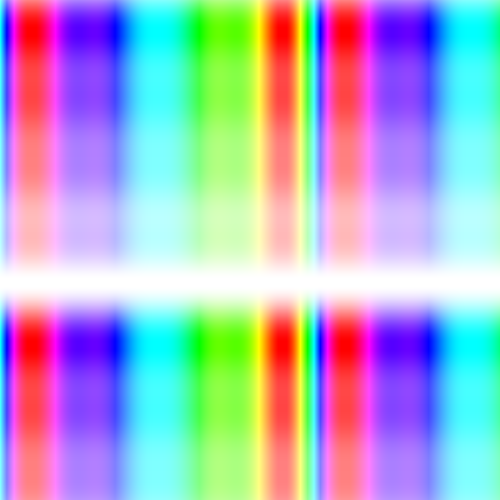

In [54]:
import numpy as np
import IPython.display
import PIL.Image
import random

# Draw a colors in grid of samples_x * samples_y

samples_x = 500
#samples_y = samples_x
samples_y = 500

pixels_per_sample = 1

size = [samples_x*pixels_per_sample, samples_y*pixels_per_sample, 3]
empty_image = np.zeros(size)

for i in range(samples_x):
    for j in range(samples_y):
        block = [i*pixels_per_sample, (i+1)*pixels_per_sample, j*pixels_per_sample, (j+1)*pixels_per_sample]
        #print(block)

        # i goes from 0 to samples_x
        # j goes from 0 to samples_y

        # Can we map i into of the coordinates of RGB system???
        h = s = v = 1 # Black

        # Example: Maping i into Hue
        # Note: In this case the h value expects numbers between 0.0 to 1.0 directly!
        i_normalized_01 = float(i) / (samples_x-1) # from 0.0 to 1.0
        s = function(i_normalized_01)

        # Example: Maping j into V (value, also known as Brightness)
        #          plus using the function as a bonus!
        j_normalized_01 = float(j) / (samples_y-1) # from 0.0 to 1.0
        h = function(j_normalized_01)

        
        rgb_01 = colorsys.hsv_to_rgb(h, s, v)
        color = [round(rgb_01[0]*255),round(rgb_01[1]*255),round(rgb_01[2]*255)]
        empty_image[block[0]:block[1],block[2]:block[3],:] = color

IPython.display.display(PIL.Image.fromarray(np.uint8(empty_image)))


### or with the previous RGB:

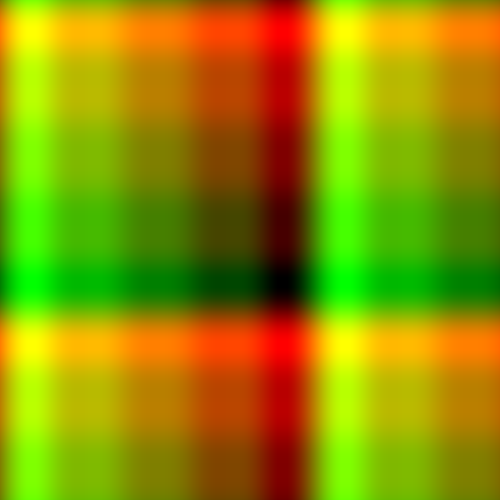

In [55]:
import numpy as np
import IPython.display
import PIL.Image
import random

# Draw a colors in grid of samples_x * samples_y

samples_x = 500
#samples_y = samples_x
samples_y = 500

pixels_per_sample = 1

size = [samples_x*pixels_per_sample, samples_y*pixels_per_sample, 3]
empty_image = np.zeros(size)

for i in range(samples_x):
    for j in range(samples_y):
        block = [i*pixels_per_sample, (i+1)*pixels_per_sample, j*pixels_per_sample, (j+1)*pixels_per_sample]
        #print(block)

        # i goes from 0 to samples_x
        # j goes from 0 to samples_y

        # Can we map i into of the coordinates of RGB system???
        r = g = b = 0 # Black

        # Example: Maping i into R
        # Note: We should convert the ranges ... this means if i originally
        #       went between 0 to samples_x (for example 100), then we need
        #       to convert it into a range for RGB values - between 0 and 255!
        i_normalized_01 = float(i) / (samples_x-1) # from 0.0 to 1.0
        r = 255 * function(i_normalized_01)

        # Example: Maping j into G
        j_normalized_01 = float(j) / (samples_y-1) # from 0.0 to 1.0
        g = 255 * function(j_normalized_01)
        
        color = [r,g,b]
        empty_image[block[0]:block[1],block[2]:block[3],:] = color

IPython.display.display(PIL.Image.fromarray(np.uint8(empty_image)))
